In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO  
import plotly.express as px
from scipy.stats.mstats import trimmed_var
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Preparation

In [4]:
def wrangle(url, filter_tag, filter_prop, cols_to_drop=None):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html5lib')
    table_stats_html = soup.find(filter_tag, filter_prop)
    table_stats = StringIO(str(table_stats_html))
    df = pd.read_html(table_stats)[0]
    df.drop(columns=cols_to_drop, inplace=True)
    return df

In [5]:
url = "https://www.basketball-reference.com/leagues/NBA_2024_per_game.html"
filter_tag = "div"
filter_prop = {"id" : "div_per_game_stats"}
df_reg_stats = wrangle(url, filter_tag, filter_prop, ['Awards', "Rk"])
# drop league Average Row or Last Row
df_reg_stats.drop(df_reg_stats.shape[0] - 1, inplace=True)
print("Shape", df_reg_stats.shape)
print(df_reg_stats.info())
df_reg_stats.head()

Shape (735, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  735 non-null    object 
 1   Age     735 non-null    float64
 2   Team    735 non-null    object 
 3   Pos     735 non-null    object 
 4   G       735 non-null    float64
 5   GS      735 non-null    float64
 6   MP      735 non-null    float64
 7   FG      735 non-null    float64
 8   FGA     735 non-null    float64
 9   FG%     727 non-null    float64
 10  3P      735 non-null    float64
 11  3PA     735 non-null    float64
 12  3P%     689 non-null    float64
 13  2P      735 non-null    float64
 14  2PA     735 non-null    float64
 15  2P%     722 non-null    float64
 16  eFG%    727 non-null    float64
 17  FT      735 non-null    float64
 18  FTA     735 non-null    float64
 19  FT%     676 non-null    float64
 20  ORB     735 non-null    float64
 21  DRB     735 non-null   

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Joel Embiid,29.0,PHI,C,39.0,39.0,33.6,11.5,21.8,0.529,...,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7
1,Luka Dončić,24.0,DAL,PG,70.0,70.0,37.5,11.5,23.6,0.487,...,0.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9
2,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,35.2,11.5,18.8,0.611,...,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4
3,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,34.0,10.6,19.8,0.535,...,0.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1
4,Jalen Brunson,27.0,NYK,PG,77.0,77.0,35.4,10.3,21.4,0.479,...,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7


In [6]:
url = "https://www.basketball-reference.com/leagues/NBA_2024_advanced.html"
filter_tag = "div"
filter_prop = {"id" : "div_advanced"}
df_adv_stats = wrangle(url, filter_tag, filter_prop, ['Awards', 'Rk'])
# drop league Average Row or Last Row
df_adv_stats.drop(df_adv_stats.shape[0] - 1, inplace=True)
print("Shape", df_adv_stats.shape)
print(df_adv_stats.info())
df_adv_stats.head()

Shape (735, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  735 non-null    object 
 1   Age     735 non-null    float64
 2   Team    735 non-null    object 
 3   Pos     735 non-null    object 
 4   G       735 non-null    float64
 5   GS      735 non-null    float64
 6   MP      735 non-null    float64
 7   PER     735 non-null    float64
 8   TS%     727 non-null    float64
 9   3PAr    727 non-null    float64
 10  FTr     727 non-null    float64
 11  ORB%    735 non-null    float64
 12  DRB%    735 non-null    float64
 13  TRB%    735 non-null    float64
 14  AST%    735 non-null    float64
 15  STL%    735 non-null    float64
 16  BLK%    735 non-null    float64
 17  TOV%    728 non-null    float64
 18  USG%    735 non-null    float64
 19  OWS     735 non-null    float64
 20  DWS     735 non-null    float64
 21  WS      735 non-null   

,Player,Age,Team,Pos,G,GS,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,DeMar DeRozan,34.0,CHI,SF,79.0,79.0,2989.0,19.7,0.584,0.166,...,7.7,25.8,7.0,2.2,9.2,0.147,2.1,-0.3,1.8,2.8
1,Domantas Sabonis,27.0,SAC,C,82.0,82.0,2928.0,23.2,0.637,0.081,...,17.9,22.2,8.6,4.0,12.6,0.206,4.0,2.4,6.5,6.2
2,Coby White,23.0,CHI,PG,79.0,78.0,2881.0,14.5,0.570,0.460,...,11.1,22.7,3.1,1.6,4.7,0.078,0.7,-1.3,-0.7,0.9
3,Mikal Bridges,27.0,BRK,SF,82.0,82.0,2854.0,14.9,0.560,0.457,...,10.3,24.3,2.1,2.1,4.2,0.070,0.7,-1.0,-0.4,1.2
4,Paolo Banchero,21.0,ORL,PF,80.0,80.0,2799.0,17.3,0.546,0.249,...,13.0,29.7,1.3,4.0,5.3,0.090,1.3,0.0,1.3,2.3


### Check for duplicated Player Entries

In [7]:
print(df_reg_stats["Player"].duplicated().sum())
print(df_adv_stats["Player"].duplicated().sum())

163
163


In [8]:
df_adv_stats[df_adv_stats["Player"].duplicated()].head()

,Player,Age,Team,Pos,G,GS,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
15,Pascal Siakam,29.0,TOR,PF,39.0,39.0,1354.0,18.8,0.600,0.233,...,10.3,25.3,2.4,0.6,3.0,0.106,2.2,-0.8,1.4,1.2
16,Pascal Siakam,29.0,IND,PF,41.0,41.0,1303.0,20.7,0.602,0.156,...,7.4,25.2,3.0,0.9,3.9,0.143,3.0,-0.5,2.5,1.5
34,Dennis Schröder,30.0,TOR,PG,51.0,33.0,1559.0,13.9,0.559,0.394,...,11.7,19.4,2.0,0.5,2.5,0.076,-0.5,-1.3,-1.8,0.1
35,Dennis Schröder,30.0,BRK,PG,29.0,25.0,927.0,12.3,0.535,0.402,...,15.0,21.8,0.3,0.5,0.8,0.042,-0.5,-1.4,-1.9,0.0
70,P.J. Washington,25.0,CHO,PF,44.0,17.0,1286.0,13.0,0.545,0.479,...,10.7,21.2,0.0,0.8,0.8,0.028,-1.7,-1.1,-2.8,-0.3


As it turns out, players who were traded in the middle season have different entries. Let us fix them by calculating for the weighted average stats given by:

$$
S_{new} = (\omega_1 S_1) + (\omega_2 S_2) 
$$

Where

$S_k$ is the a statistic (like points, assists, etc.) of $k_{th}$ row.

$\omega_k$ is the proportion of the games played (`G`) on $k_{th}$ row over total games played.


In [10]:
def weighted_average(df):
    duplicated = df[df["Player"].duplicated()]
    result = []
    
    for player in duplicated['Player'].unique():
        row_k = {}
    
        # Delete rows in df_adv_stats with corresponding player 
        df = df[df["Player"] != player]
        
        # Look for rows with specified player
        mask = duplicated['Player'] == player
        df_k = duplicated[mask]
    
        # Total Games
        row_k["G"] = df_k['G'].sum()
        weight = df_k['G'] / row_k["G"]
        row_k["GS"] = df_k['GS'].sum()
        
        # Get all the numerical column without `G` and `GS`
        for col in duplicated.select_dtypes("number").drop(columns=["G", "GS"]).columns:
            row_k[col] = (df_k[col] * weight).sum()
        # Get all the non-numeric column
        for col in duplicated.select_dtypes("object").columns:
            #Get last occurence
            row_k[col] = df_k.iloc[-1][col]
        result.append(row_k)
    
    aggregated = pd.DataFrame(result)
    df_new = pd.concat([df, aggregated], ignore_index=True)
    return df_new

#### Handling Duplicates for `df_reg_stats`

In [11]:
df_reg_stats_new = weighted_average(df_reg_stats)
df_reg_stats_new.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Joel Embiid,29.0,PHI,C,39.0,39.0,33.6,11.5,21.8,0.529,...,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7
1,Luka Dončić,24.0,DAL,PG,70.0,70.0,37.5,11.5,23.6,0.487,...,0.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9
2,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,35.2,11.5,18.8,0.611,...,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4
3,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,34.0,10.6,19.8,0.535,...,0.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1
4,Jalen Brunson,27.0,NYK,PG,77.0,77.0,35.4,10.3,21.4,0.479,...,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7


#### Handling Duplicates for `df_adv_stats`

In [12]:
df_adv_stats_new = weighted_average(df_adv_stats)
df_adv_stats_new.head()

,Player,Age,Team,Pos,G,GS,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,DeMar DeRozan,34.0,CHI,SF,79.0,79.0,2989.0,19.7,0.584,0.166,...,7.7,25.8,7.0,2.2,9.2,0.147,2.1,-0.3,1.8,2.8
1,Domantas Sabonis,27.0,SAC,C,82.0,82.0,2928.0,23.2,0.637,0.081,...,17.9,22.2,8.6,4.0,12.6,0.206,4.0,2.4,6.5,6.2
2,Coby White,23.0,CHI,PG,79.0,78.0,2881.0,14.5,0.570,0.460,...,11.1,22.7,3.1,1.6,4.7,0.078,0.7,-1.3,-0.7,0.9
3,Mikal Bridges,27.0,BRK,SF,82.0,82.0,2854.0,14.9,0.560,0.457,...,10.3,24.3,2.1,2.1,4.2,0.070,0.7,-1.0,-0.4,1.2
4,Paolo Banchero,21.0,ORL,PF,80.0,80.0,2799.0,17.3,0.546,0.249,...,13.0,29.7,1.3,4.0,5.3,0.090,1.3,0.0,1.3,2.3


#### Delete `Team` column for both
Let us now delete the `Team` column for it serves no purpose going forward.

In [13]:
df_adv_stats_new.drop(columns="Team", inplace=True)
df_reg_stats_new.drop(columns="Team", inplace=True)

# Check for duplicates again
print(df_reg_stats_new["Player"].duplicated().sum())
print(df_adv_stats_new["Player"].duplicated().sum())

0
0


### Checking for common columns between advanced and regular stats

In [15]:
common_columns = list(set(df_adv_stats_new.columns) & set(df_reg_stats_new.columns))
common_columns

['Pos', 'G', 'Player', 'Age', 'MP', 'GS']

Let's remove these columns but the *Player* column from `df_adv_stats`.

In [16]:
df_adv_stats_new.drop(columns=[x for x in common_columns if x != "Player"], inplace=True, errors="ignore")

### Join Regular and Advanced Stats
Before anything, let us check if there exist an uncommon *Player* between the two sets.

$Let \ \ A = \text{Set of Elements of df\_reg\_stats['Player']}$

$Let \ \ B = \text{Set of Elements of df\_adv\_stats['Player']}$

To get the elements that is not common between two sets, we'll have to compute for the following:

$(A \cap B)^c = U - (A \cap B)$

where $U$ is the universal set. In our case, $U = A \cup B$ are the overall pool of players.

So, $(A \cap B)^c = U - (A \cap B) = (A \cup B) - (A \cap B)$ ; will be the set where a player exist on one of the two sets ($A$ and $B$) but not both.

In [17]:
universal_set = set(pd.concat([df_reg_stats_new['Player'], df_adv_stats_new['Player']]))
reg_inter_adv = set(df_reg_stats_new['Player']) & set(df_adv_stats_new['Player'])
# To get the uncommon element between the two
complement_inter = universal_set - reg_inter_adv 
complement_inter

set()

It appear that there is no uncommon player between the two sets. 

With that in mind, we can now proceed to combine the two table we shall get same row count while combining the column count of the two table.

In [18]:
df_with_name = pd.merge(df_reg_stats_new, df_adv_stats_new, on="Player", how="left")
df = df_with_name.drop(columns=["Player", 'Pos']).fillna(0)
print(f"Reg Stats Shape: {df_reg_stats_new.shape} & Adv Stats Shape {df_adv_stats_new.shape}")
print("Combined Shape", df.shape)
df.columns

Reg Stats Shape: (572, 28) & Adv Stats Shape (572, 21)
Combined Shape (572, 46)


Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

## Explore

### Missing data

In [29]:
df.isna().sum().sum()

0

### Data Types

In [27]:
df.dtypes.value_counts()

float64    46
Name: count, dtype: int64

### Summary Statistics

In [20]:
df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,...,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,25.743007,46.153846,21.503497,18.651588,3.120768,6.683007,0.447679,0.942466,2.646211,0.298590,...,11.883362,18.139891,1.114887,1.009302,2.125726,0.074919,-1.606331,-0.184039,-1.791193,0.515675
std,4.225107,25.535953,26.906890,9.906921,2.459292,4.991641,0.112812,0.879519,2.241424,0.149978,...,5.461095,6.289260,1.780847,1.054062,2.645302,0.097490,3.935910,2.045680,5.246317,1.261694
min,19.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.500000,0.000000,-1.700000,-0.585000,-18.600000,-10.100000,-28.800000,-1.700000
25%,23.000000,22.000000,0.000000,10.800000,1.300000,3.000000,0.407273,0.200000,0.900000,0.250000,...,9.100000,13.975000,0.000000,0.200000,0.200000,0.038076,-3.200000,-1.000000,-3.600000,-0.100000
50%,25.000000,51.000000,7.000000,17.350000,2.400000,5.100000,0.450000,0.705882,2.100000,0.338500,...,11.473846,17.000000,0.400000,0.700000,1.100000,0.083000,-1.500000,-0.200000,-1.519737,0.000000
75%,28.000000,69.000000,41.250000,27.000000,4.500000,9.100000,0.500000,1.500000,3.825000,0.383652,...,14.100000,21.700000,1.600000,1.600000,3.400000,0.125250,0.400000,0.800000,0.800000,0.800000
max,39.000000,84.000000,82.000000,37.800000,11.500000,23.600000,0.747000,4.800000,11.800000,1.000000,...,57.100000,72.500000,12.000000,5.800000,17.000000,0.665000,29.100000,16.000000,43.300000,10.600000


### Distribution and Outliers

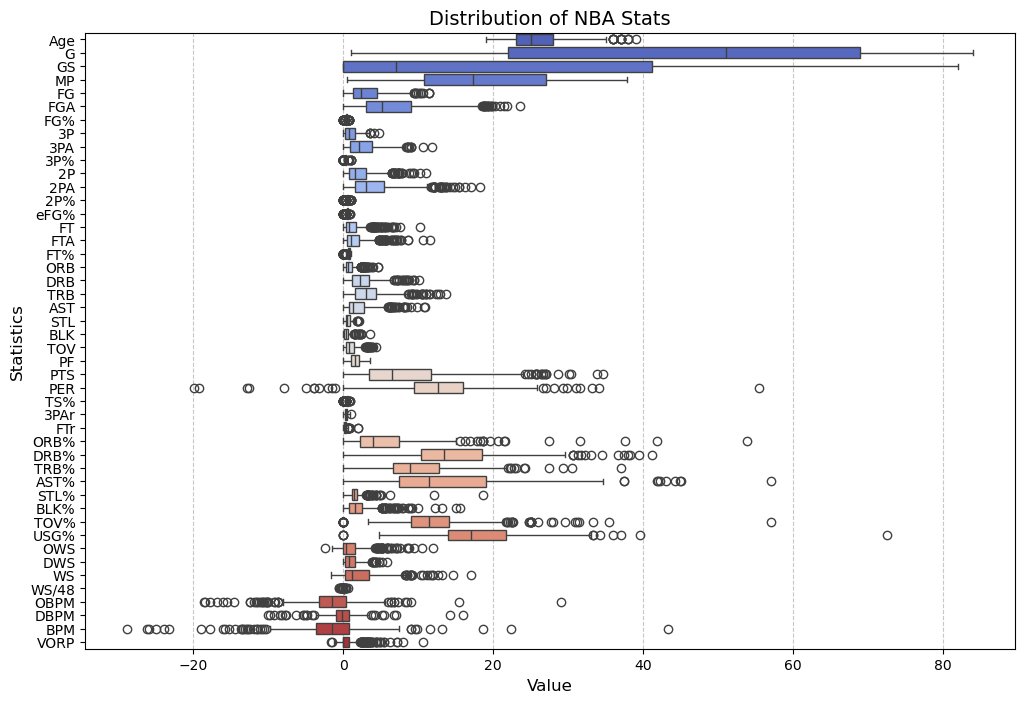

In [ ]:
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=df, orient="h", showfliers=True, palette="coolwarm") 
plt.title("Distribution of NBA Stats", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Statistics", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)  
plt.show()


In [64]:
def detect_outliers(data, multiplier=1.5):
    result = {}
    for col in data.columns:
        column = data[col]
        lower, upper = column.quantile([0.25, 0.75])
        iqr = upper - lower
        lower_bound = lower - iqr*multiplier
        upper_bound = upper + iqr*multiplier
        count_in = column.between(lower_bound, upper_bound).sum()
        n = len(column)
        count_out = n - count_in
        result[col] = count_out

    return result

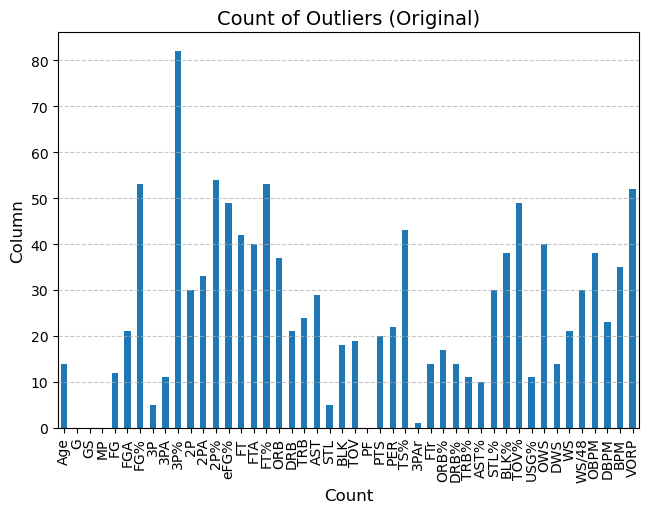

In [65]:
outliers = pd.Series(detect_outliers(df))
outliers.plot(kind="bar")
plt.tight_layout()
plt.title("Count of Outliers (Original)", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Column", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)  
plt.show()

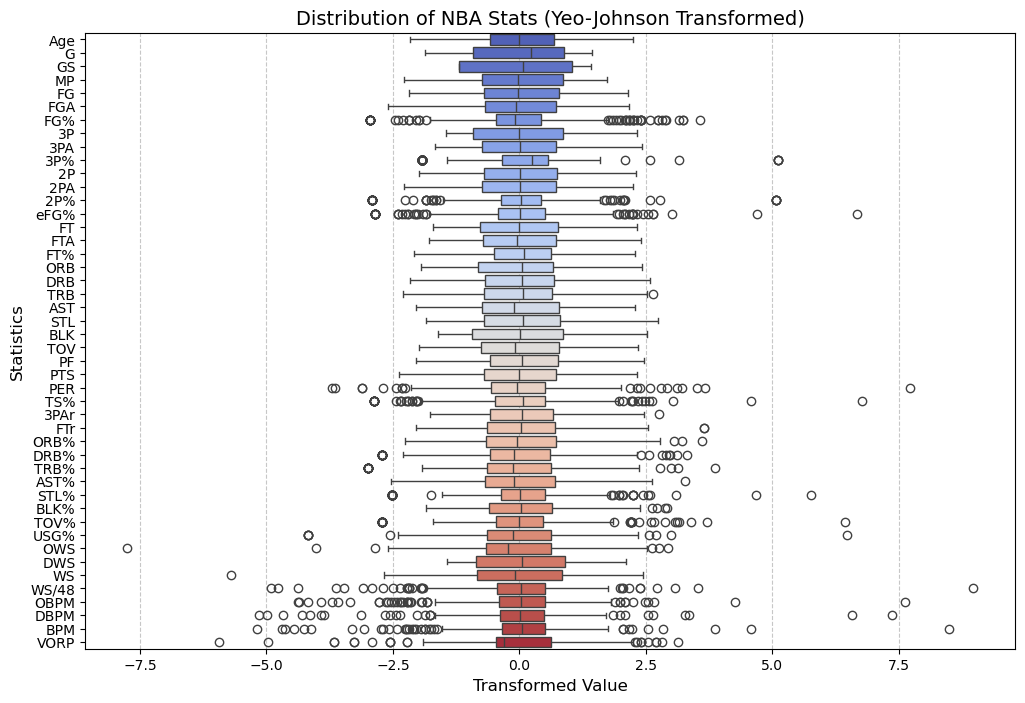

In [76]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transformed = pt.fit_transform(df)
cols = df.columns

df_trans = pd.DataFrame(transformed, columns=cols)

plt.figure(figsize=(12, 8)) 
sns.boxplot(data=df_trans, orient="h", showfliers=True, palette="coolwarm") 
plt.title("Distribution of NBA Stats (Yeo-Johnson Transformed)", fontsize=14)
plt.xlabel("Transformed Value", fontsize=12)
plt.ylabel("Statistics", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)  
plt.show()

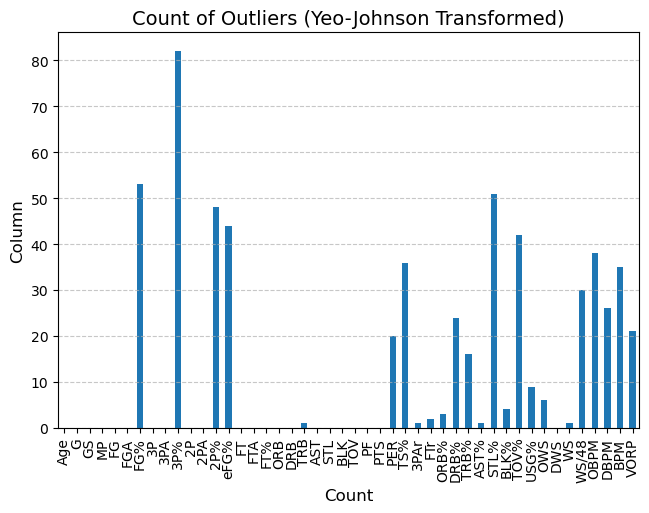

In [77]:
outliers = pd.Series(detect_outliers(df_trans))
outliers.plot(kind="bar")
plt.tight_layout()
plt.title("Count of Outliers (Yeo-Johnson Transformed)", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Column", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)  
plt.show()

### Correlation

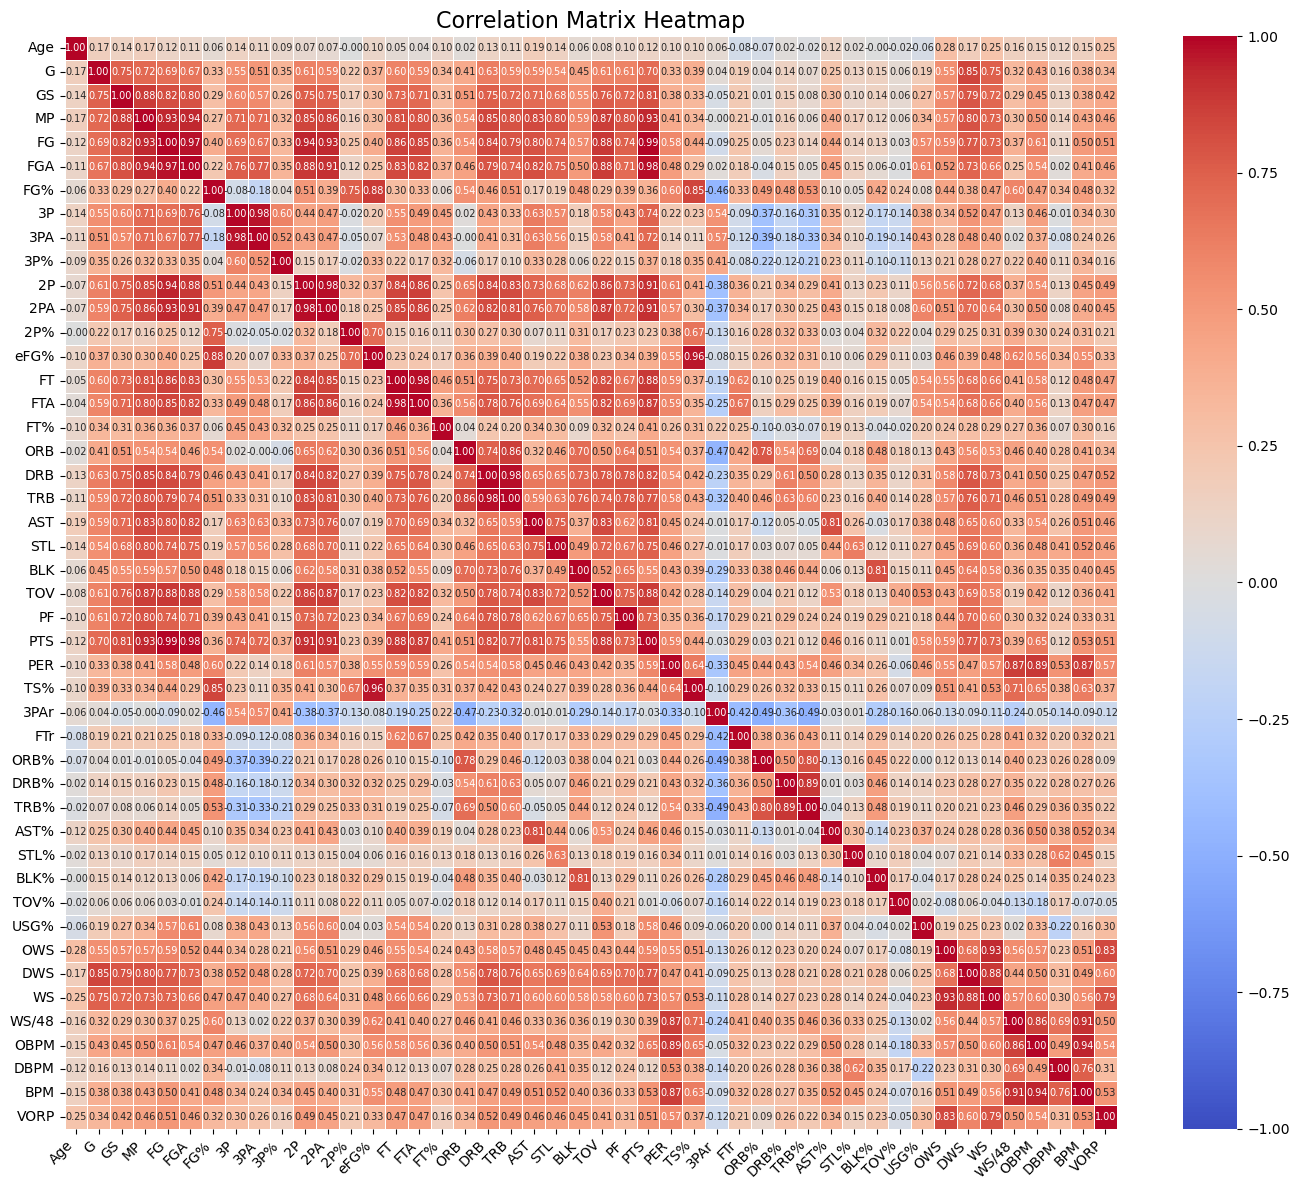

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_trans.corr(numeric_only=True)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(corr, 
                      annot=True,
                      cmap='coolwarm',
                      vmin=-1, vmax=1,
                      fmt='.2f',
                      linewidths=0.5,
                      annot_kws={"size": 7}) 

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

It is not clear but it appears that there are some pairs of columns that are highly correlated. It is important to drop one of the highly correlated pairs (>.90) to reduce redundancy, prevent bias due to multicollinearity. 

In [82]:
corr_uns = corr.unstack()
corr_uns = corr_uns[corr_uns != 1]
corr_uns[abs(corr_uns) > 0.9]

MP     FG       0.933042
       FGA      0.937233
       PTS      0.934120
FG     MP       0.933042
       FGA      0.974399
       2P       0.941064
       2PA      0.933358
       PTS      0.992628
FGA    MP       0.937233
       FG       0.974399
       2PA      0.911226
       PTS      0.977325
3P     3PA      0.975808
3PA    3P       0.975808
2P     FG       0.941064
       2PA      0.980219
       PTS      0.912002
2PA    FG       0.933358
       FGA      0.911226
       2P       0.980219
       PTS      0.910009
eFG%   TS%      0.963462
FT     FTA      0.983506
FTA    FT       0.983506
DRB    TRB      0.977611
TRB    DRB      0.977611
PTS    MP       0.934120
       FG       0.992628
       FGA      0.977325
       2P       0.912002
       2PA      0.910009
TS%    eFG%     0.963462
OWS    WS       0.929541
WS     OWS      0.929541
WS/48  BPM      0.910065
OBPM   BPM      0.940134
BPM    WS/48    0.910065
       OBPM     0.940134
dtype: float64

Most of these are needed variables to differentiate one play style to other. For that reason, we can't just drop any of these variables. Instead, let us resort to Mahalanobis distance to account for multicollinearity instead of Euclidian distance. 

### PCA
#### Standardization
Normally standardization for PCA was done with *Z-Scaling* or taking the *Z-Score* of each data point. 

Z-Score is given by:
$$
Z-Score = \frac{x_k - \overline{x}_k}{s_k}
$$

Where:

$x_k$ is the data point in $k$ column.

$\overline{x}_k$ the mean of $k$ column.

and

$s_k$ is the standard deviation of the $k$ column.

By the end of *z-scaling*, the mean and std should be 0 and 1, respectively for all columns.

But given that significant amount of outliers of exists and we can't remove them, let us use a more robust scaling method.

Robust Scaling is given by:
$$
X-scaled = \frac{x_k - Med_k}{IQR_k}
$$

Where:

$x_k$ is the data point in $k$ column.

$ Med_k$ the median of $k$ column.

and

$IQR_k$ is the Interquartile Range of the $k$ column.

By the end of *robust scaling*, the median and IQR should be 0 and 1, respectively for all columns.


In [220]:
median = log_df.agg(['median']).T.squeeze()
lower, upper = log_df.quantile([0.25,0.75]).to_numpy()
iqr = upper - lower
df_r = log_df.apply(lambda x: (x - median)/ iqr, axis=1)
print("Median Counts: \n", df_r.median().apply(round).value_counts())

lower, upper = df_r.quantile([0.25,0.75]).to_numpy()
iqr = pd.Series(upper - lower)
print("IQR Counts: \n", iqr.apply(round).value_counts())

Median Counts: 
 0    46
Name: count, dtype: int64
IQR Counts: 
 1    46
Name: count, dtype: int64


In [221]:
mean, std = log_df.agg(["mean", "std"]).to_numpy()
df_z = log_df.apply(lambda x: (x - mean) / std, axis=1)
df_z.agg(['mean', 'std']).T.apply(round).value_counts()

mean  std
-0.0  1.0    46
Name: count, dtype: int64

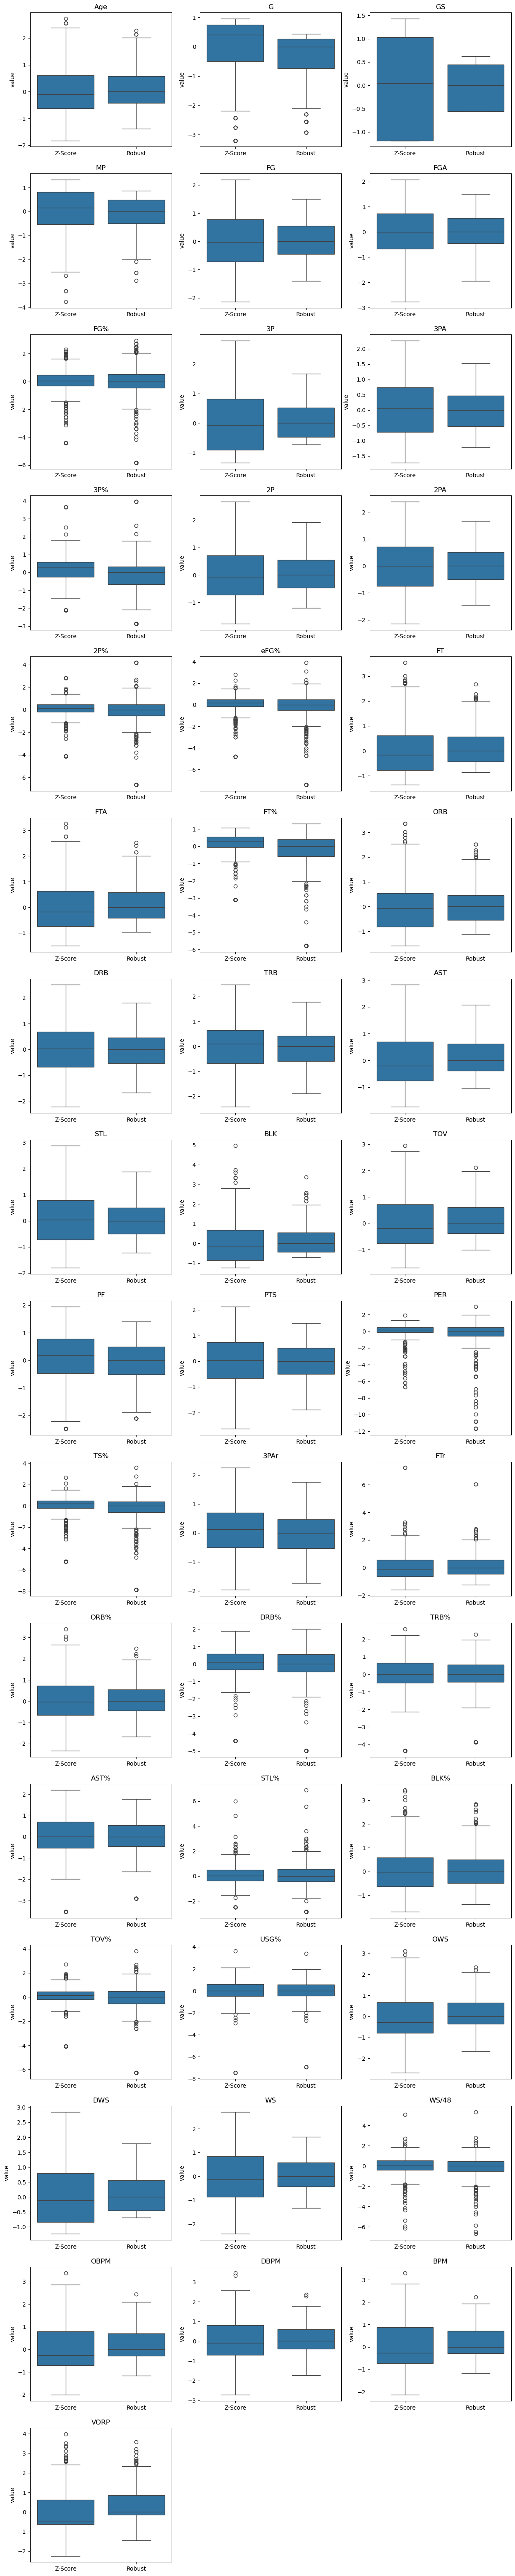

In [227]:
cols_per_row = 3
columns = df_z.columns
rows = int(np.ceil(len(columns)/cols_per_row))
fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(columns):
    df_temp = pd.DataFrame({
        'value' : pd.concat([df_z[col],df_r[col]], ignore_index=True),
        'label' : ['Z-Score']*len(df_z) + ['Robust']*len(df_r)
    }).reset_index()
    sns.boxplot(df_temp, y='value', x='label', ax=axes[i]).set(xlabel=None)
    axes[i].set_title(col)

for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

fig.savefig("hello")

In [228]:
cov_matrix = np.cov(df_r, rowvar=False)

In [229]:
eig_val, eig_vec = np.linalg.eig(cov_matrix)
eig_vec.shape

(46, 46)

#### Choosing how many principal components to retain

<Figure size 1600x800 with 0 Axes>

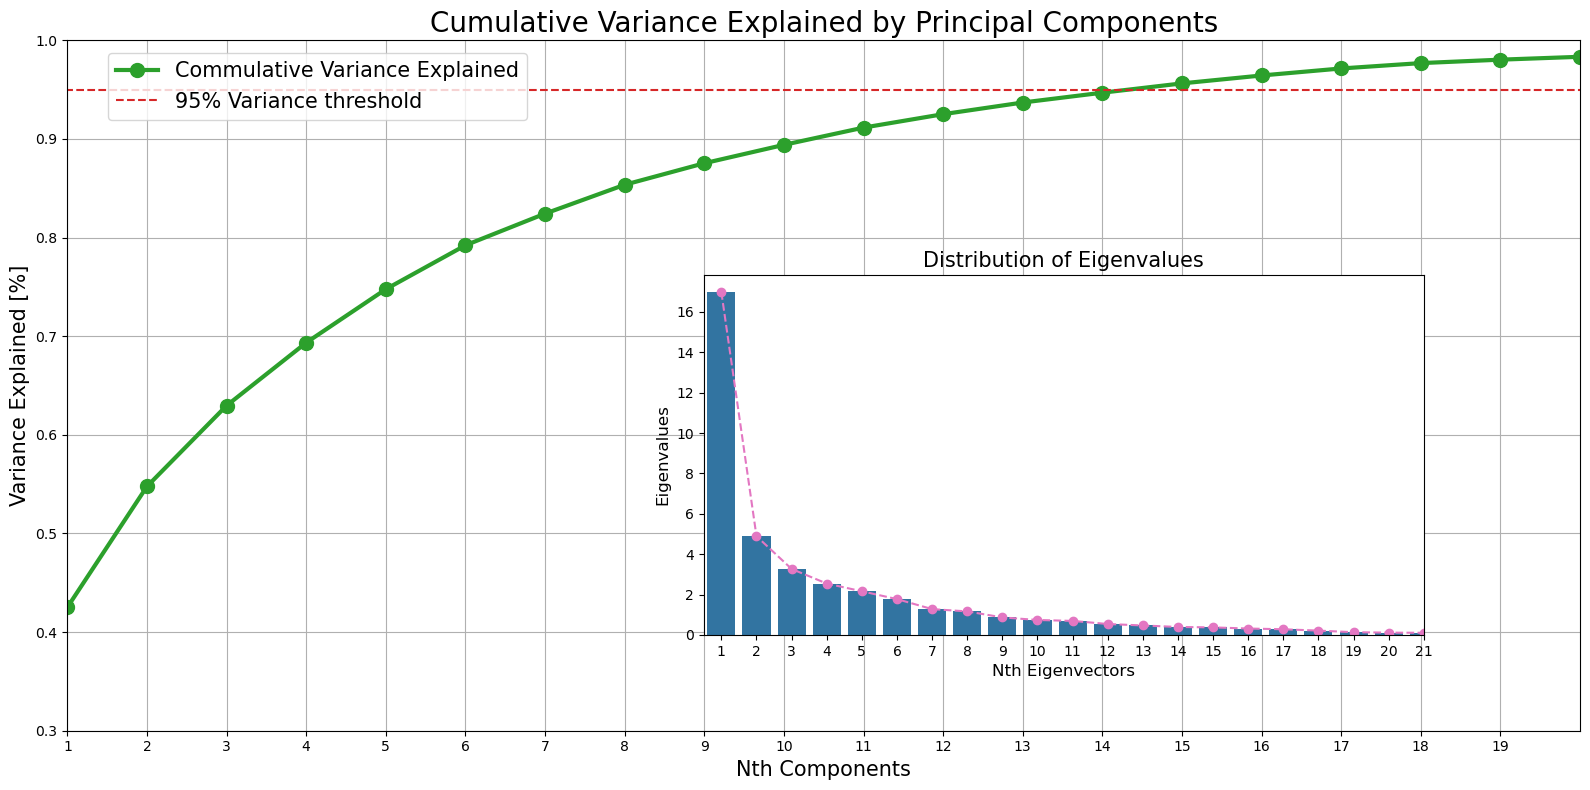

In [370]:
n_disp = 20

plt.figure(figsize=(16,8))
sorted_index = np.argsort(eig_val)[::-1]
var_exp = [{"n_comp": x+1, "var_exp": eig_val[x]}  for x in sorted_index]
ser_var = pd.DataFrame(var_exp).set_index('n_comp').squeeze()

total = sum(ser_var)
ser_var_norm = ser_var / total
commulative = np.cumsum(ser_var_norm)

# For bigger plot
fig = plt.figure(figsize=(16,8))
commulative.plot(marker='o', color="C2", linewidth=3,markersize=10, label="Commulative Variance Explained")


plt.plot([0.95]*len(commulative),linestyle="--",label="95% Variance threshold", color="C3")

plt.xlabel("Nth Components", fontsize=15)
plt.ylabel("Variance Explained [%]",  fontsize=15)
plt.title("Cumulative Variance Explained by Principal Components",  fontsize=20)
plt.xlim((1,n_disp))
plt.ylim((0.3,1))

plt.xticks(range(1,n_disp))
plt.grid()
plt.legend(loc="upper left",prop={'size': 15}, bbox_to_anchor=(0.02, 0.997))
plt.tight_layout()

# For smaller one
small_ax = fig.add_axes([0.443,0.20, 0.45,0.45])
sns.barplot(ser_var, ax=small_ax)
ser_var.reset_index()['var_exp'].plot(linestyle='--', marker='o', color="C6", ax=small_ax)

# for i, val in enumerate(ser_var):
#     if i < n_disp:
#         plt.text(i, val, round(val, 2), ha='center', va='bottom', fontsize=13)


plt.xlabel("Nth Eigenvectors", fontsize=12)
plt.ylabel("Eigenvalues",  fontsize=12)
plt.title("Distribution of Eigenvalues",  fontsize=15)
plt.xlim((-0.5,n_disp))
plt.show()

It appears that 15 Principal components can explain > 95% of the variance. Thus, we shall choose 15 principal components and proceed with hierarchical cluster analysis.

In [377]:
top_15_index = sorted_index[:15]

In [378]:
final_eig_val, final_eig_vec = eig_val[top_15_index], eig_vec[:,top_15_index]

In [380]:
final_eig_vec.shape

(46, 15)

In [391]:
df_pca = pd.DataFrame(np.dot(df_r, final_eig_vec), columns= [f"PC{i+1}" for i in range(final_eig_vec.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,7.103804,-3.116761,-4.109910,-1.203785,0.013793,0.338303,-0.833982,0.425451,-1.072055,-1.798528,0.460206,0.271134,0.851863,-0.253415,0.344725
1,6.207411,-4.296910,-2.207781,-1.005913,0.884213,1.503410,-1.152182,0.481530,-0.949796,-1.516714,1.429568,1.062390,-1.094892,-0.103414,0.569475
2,7.193491,-1.965329,-4.762926,-1.041306,1.270480,1.006581,-1.044795,-0.423798,-1.373241,-1.398831,0.617138,-0.042238,-0.433675,-0.392645,0.103715
3,6.143133,-3.642192,-2.668757,-2.205265,0.216651,1.270906,-1.237887,-1.291347,-0.304450,-1.986659,0.449377,0.304920,-0.533638,-0.434906,-0.317832
4,4.132357,-4.478206,-0.837778,-1.650802,1.525468,0.784636,-1.932795,-0.699670,-1.506071,-0.991619,0.612996,0.047630,-0.751842,0.285577,0.092484


,PC1,PC2,PC3,PC4,PC5
0,7.103804,-3.116761,-4.109910,-1.203785,0.013793
1,6.207411,-4.296910,-2.207781,-1.005913,0.884213
2,7.193491,-1.965329,-4.762926,-1.041306,1.270480
3,6.143133,-3.642192,-2.668757,-2.205265,0.216651
4,4.132357,-4.478206,-0.837778,-1.650802,1.525468
...,...,...,...,...,...
567,-5.722783,-1.352434,-0.488617,-1.491981,-3.522486
568,-4.234081,2.369015,-2.262785,0.001744,-2.477131
569,-4.048998,1.078071,-1.396986,0.809325,-1.086828
570,-3.058722,0.075746,0.585910,-0.025442,-1.866278


<Figure size 4500x4500 with 0 Axes>

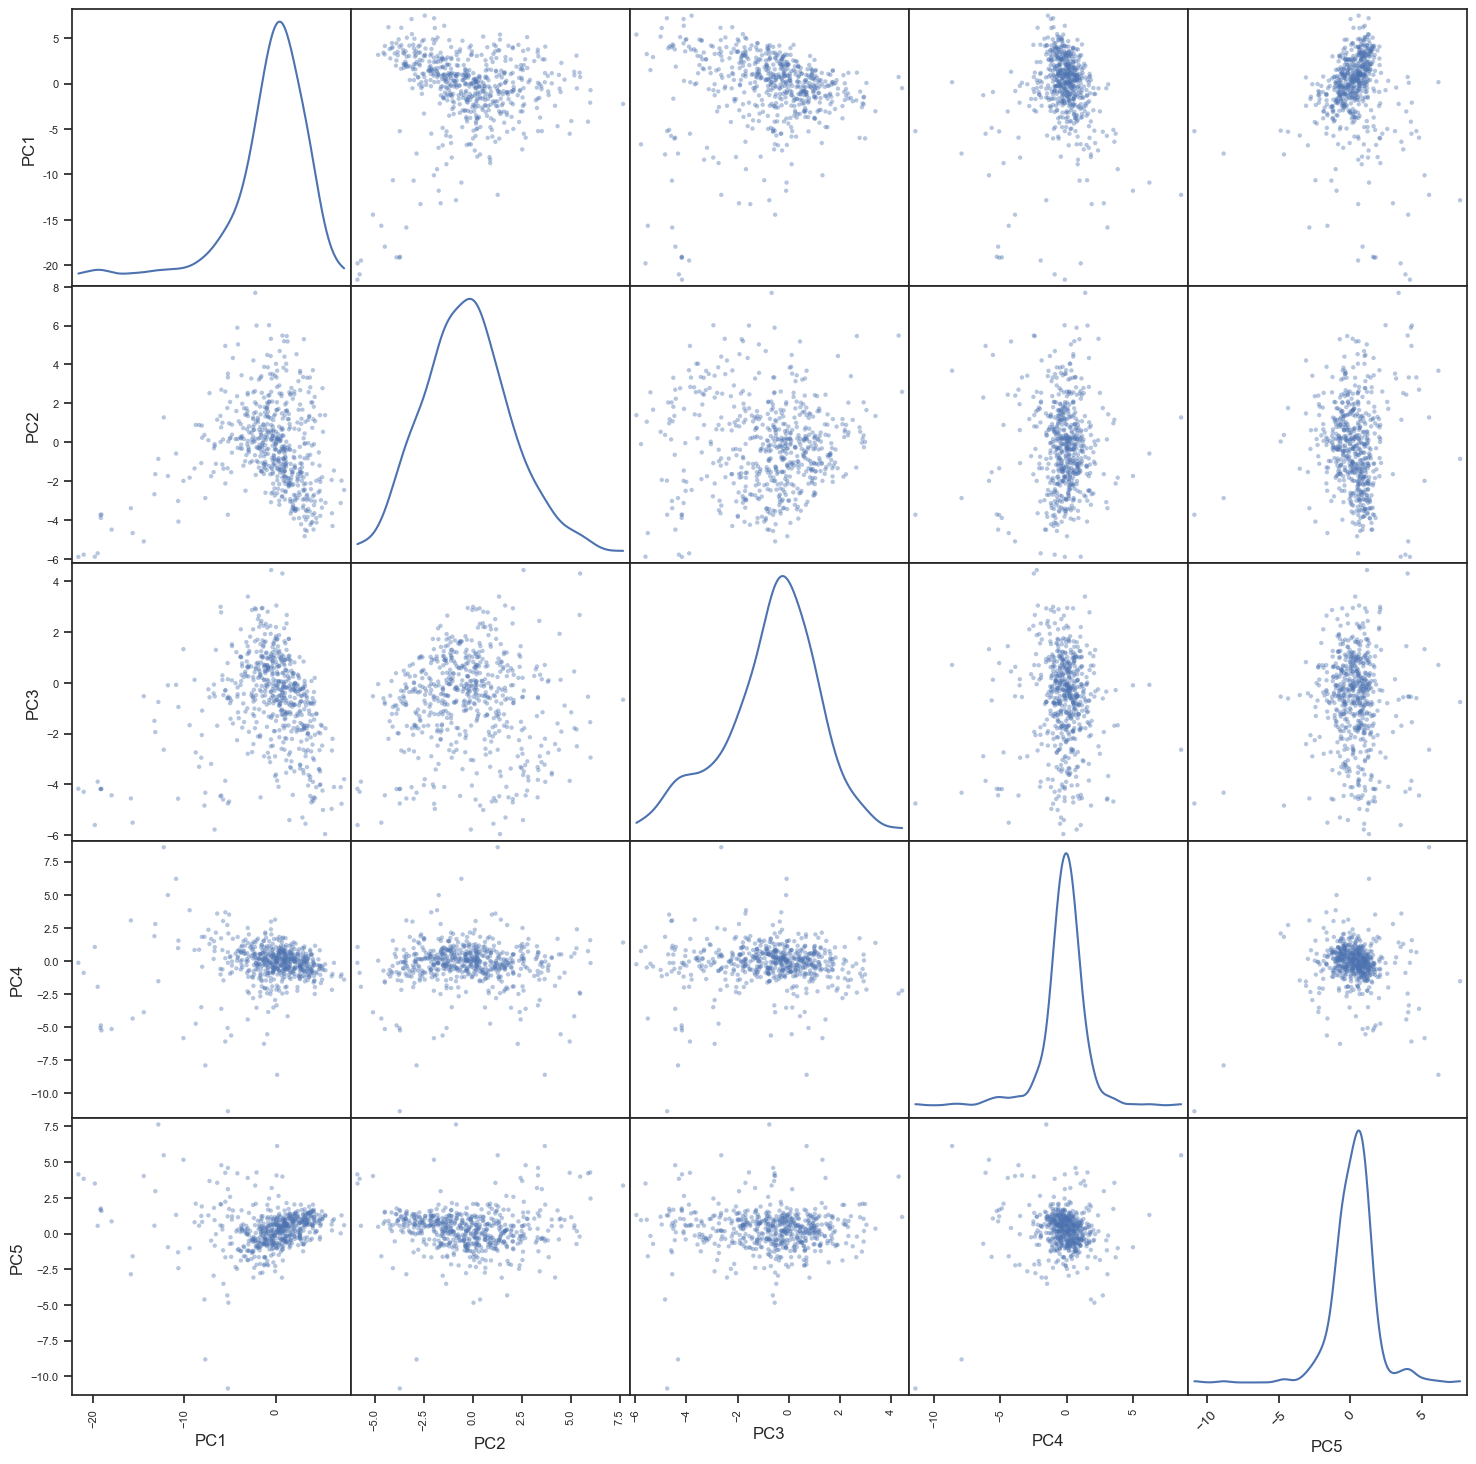

In [400]:
plt.figure(figsize=(30,30), dpi=150)
df_pca_subset = df_pca.iloc[:,:5]
pd.plotting.scatter_matrix(df_pca_subset, 
               alpha=0.4, 
               figsize=(18, 18), 
               diagonal='kde',
               marker='o', 
               s=10,  
               hist_kwds={'edgecolor': 'black'})

plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

It still isn't clear whether there exist cluster present. But the normal distribution (closely) of different PCA is a positive indicator that our PCA might be succesful. Now, let us do hierarchical clustering.

### Hierarchical Clustering
Let's first start with a cluster map and dendograms to look for potential clusters.

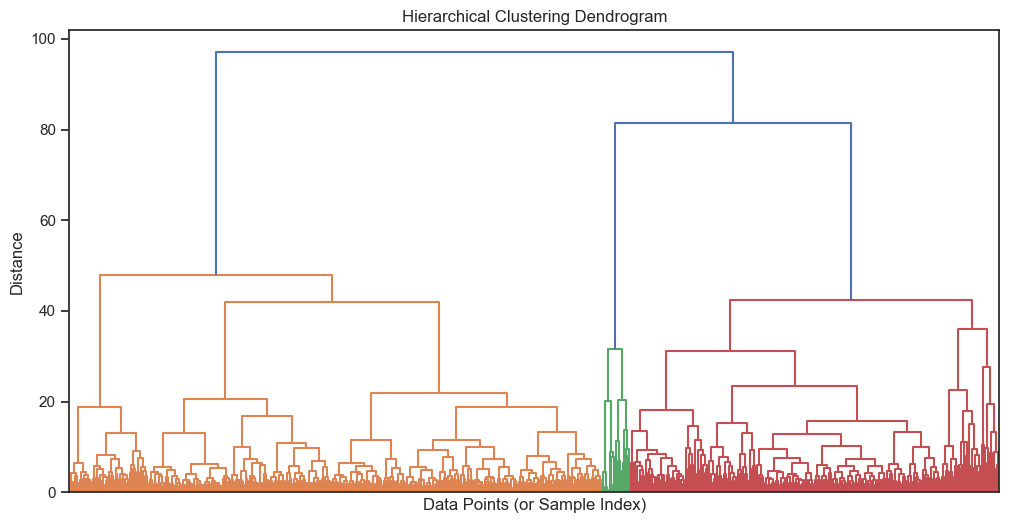

In [410]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df_pca, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.xlabel("Data Points (or Sample Index)")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.xticks([])
plt.savefig("Dendogram")
plt.show()

Looking at this very nice dendogram, we can see the different hierarchical clusters of rows. The lower the disance, the more simmilar the data points  under them are. With that being said, I think it is reasonable to pick a cluster from a distance of around 18 - 35.

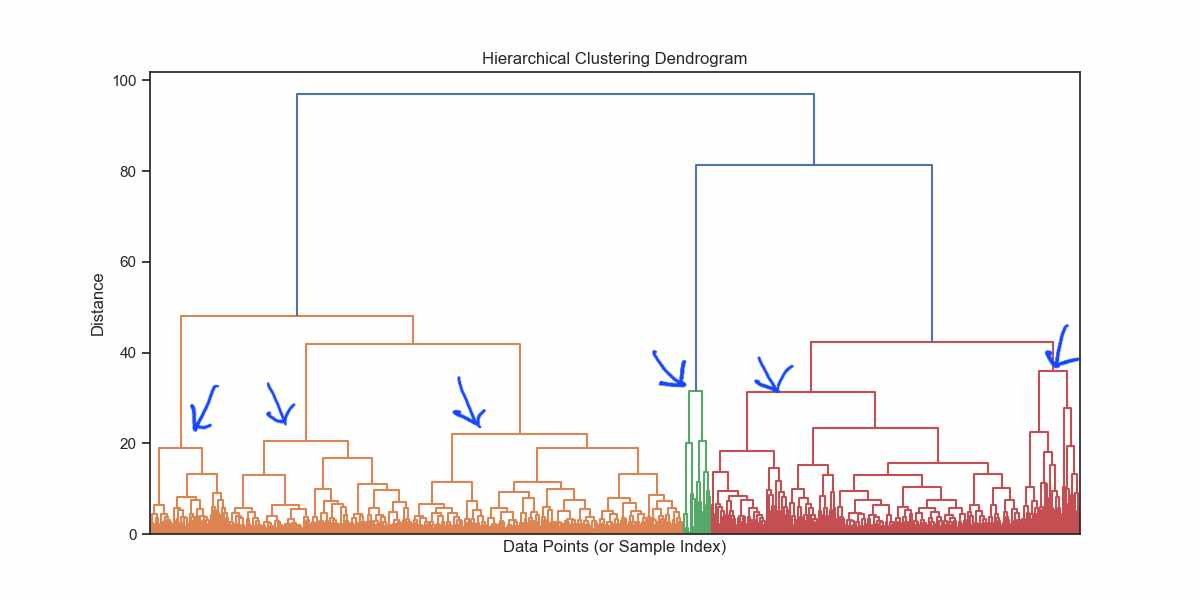

I have decided to pick these cluster. Meaning, we'll have 6 groups in total.

In [437]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=6, metric='euclidean',linkage='ward')
cluster_labels = model.fit_predict(df_pca)

In [438]:
pd.Series(cluster_labels).value_counts()

1    191
4    166
5    113
3     49
0     36
2     17
Name: count, dtype: int64

<Axes: xlabel='PC1', ylabel='PC2'>

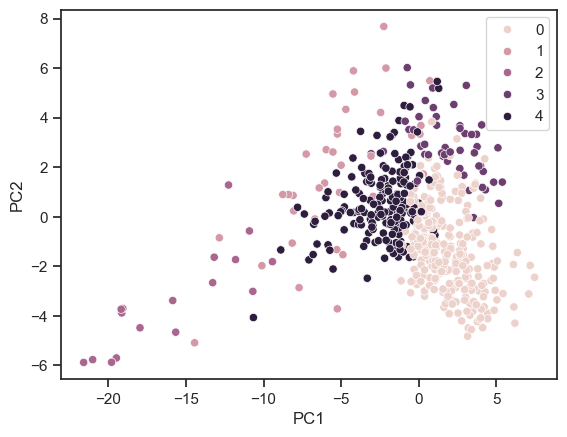

In [427]:
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=cluster_labels)

<Figure size 4500x4500 with 0 Axes>

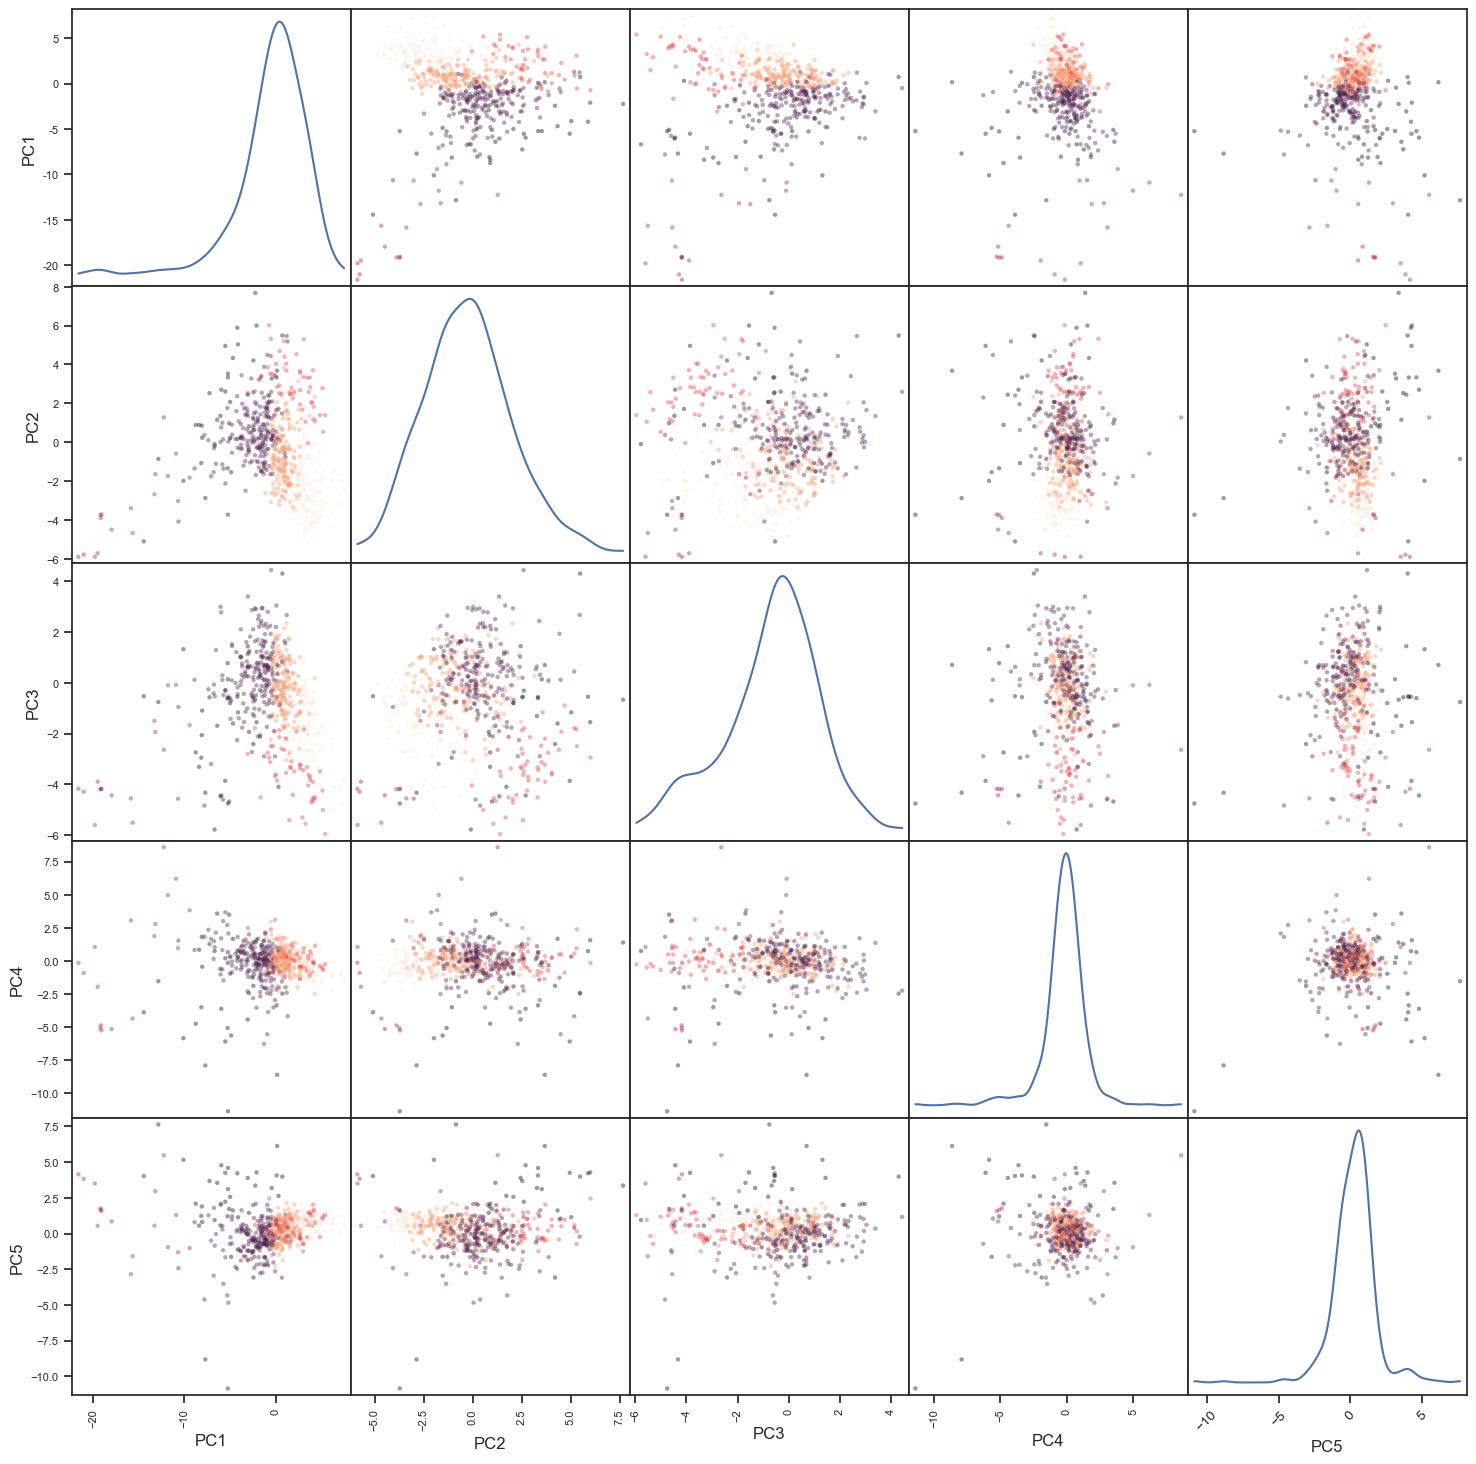

In [431]:
plt.figure(figsize=(30,30), dpi=150)
df_pca_subset = df_pca.iloc[:,:5]
pd.plotting.scatter_matrix(df_pca_subset, 
               alpha=0.4, 
               figsize=(18, 18), 
               diagonal='kde',
               marker='o', 
               s=10,  
               hist_kwds={'edgecolor': 'black'},
                          c=cluster_labels)

plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10) 
plt.savefig("try")
plt.show()

1    191
4    166
5    113
3     49
0     36
2     17
Name: count, dtype: int64